## **Libraries**

In [2]:
import numpy as np
import pandas as pd
import sympy as sp
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(["ggplot"])

from dython.nominal import identify_numeric_columns,identify_nominal_columns,associations
from joblib import dump

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score,recall_score,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier

In [3]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

## **Data**

Import the dataset bank-additional-full.csv ke dalam variabel **bank_marketing**

In [4]:
bank_marketing = pd.read_csv("bank-additional-full.csv",sep=";")
bank_marketing.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


make a copy of data, and define it by *df* and see the information of dataset that will be used

In [5]:
df = bank_marketing.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## **Pre-Processing Data**

make the information of data become a table

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [7]:
df.describe(include='object').T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


replace all unknown variable by NaN, and then delete all of NaN value

In [8]:
df = df.replace("unknown",np.nan)
df = df.dropna()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


To find correlation between numerical and categorical variables, we can use the help of *Dython* libraty.

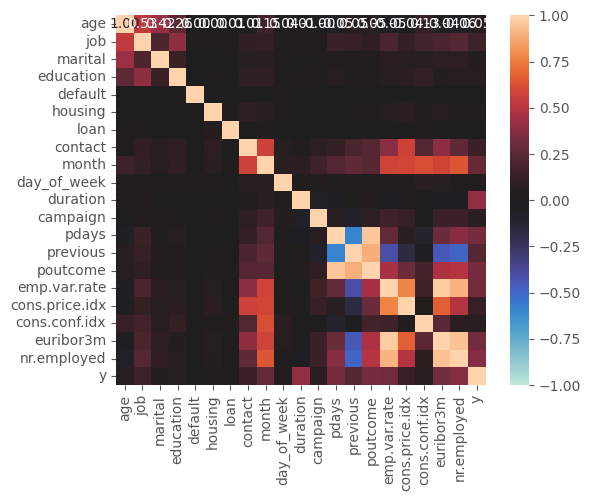

In [9]:
correlation = associations(df)

And we only want to see the correlation of features and target, we can slice and take the *y* column.

In [10]:
df_correlation = correlation["corr"][["y"]].iloc[:-1].sort_values("y",ascending=False)
df_correlation.style.background_gradient(cmap="coolwarm",axis=None)

,y
duration,0.393530
nr.employed,0.364230
pdays,0.327509
poutcome,0.322919
euribor3m,0.315869
emp.var.rate,0.305365
month,0.277624
previous,0.228003
job,0.153701
contact,0.143642


According to [PH717 Module 9 - Correlation and Regression](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html), the strength of correlation coefficients can be describes as follows:

| Correlation Coefficient | Decription |
| :---: | :---: |
| 1.0 | Perfect Positive |
| 0.8 to 1.0 | Very Strong |
| 0.6 to 0.8 | Strong |
| 0.4 to 0.6 | Moderate |
| 0.2 to 0.4 | Weak |
| 0.0 to 0.2 | Very Weak |
| 0.0 to -0.2 | Very Weak |
| -0.2 to -0.4 | Weak |
| -0.4 to -0.6 | Moderate |
| -0.6 to -0.8 | Strong |
| -0.8 to -1.0 | Very Strong |
| -1.0 | Perfect Negative |

Based on the table above, it can be seen there are 8 variables that have weak-to-moderate correlation (highlighted in blue) and 12 variables that have very weak correlation (highlighted in grey)

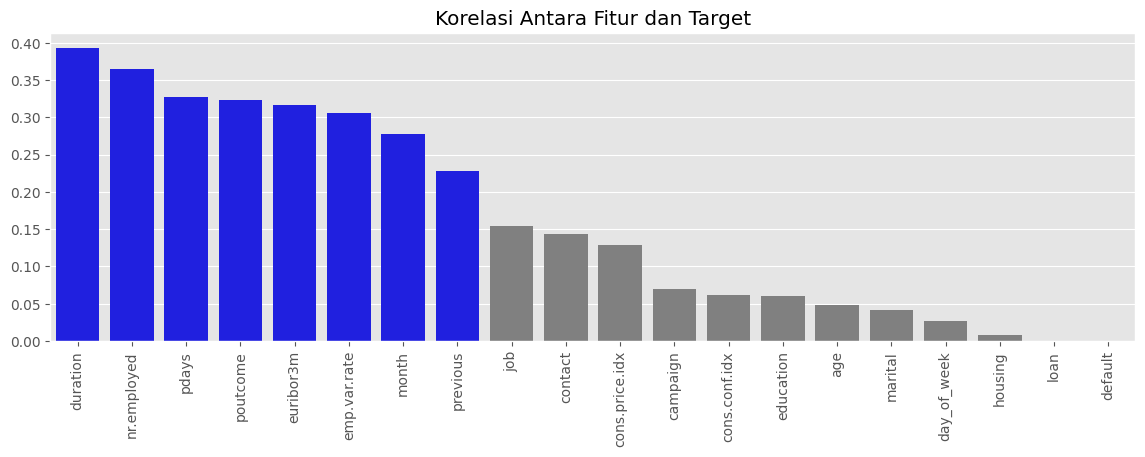

In [11]:
plt.figure(figsize=(14,4))
sns.barplot(data=df_correlation,x=df_correlation.index,y="y",palette=["blue" if i >= 0.2 else "grey" for i in df_correlation["y"]])
plt.title("Korelasi Antara Fitur dan Target")
plt.xticks(rotation=90)
plt.ylabel("")
plt.show()

Remove 12 variables that have very weak correlation

In [12]:
df = df[list(df_correlation[df_correlation["y"] >= 0.2].index) + ["y"]]
df.head()

,duration,nr.employed,pdays,poutcome,euribor3m,emp.var.rate,month,previous,y
0,261,5191.0,999,nonexistent,4.857,1.1,may,0,no
2,226,5191.0,999,nonexistent,4.857,1.1,may,0,no
3,151,5191.0,999,nonexistent,4.857,1.1,may,0,no
4,307,5191.0,999,nonexistent,4.857,1.1,may,0,no
6,139,5191.0,999,nonexistent,4.857,1.1,may,0,no


Identify numerical and categorical coloumn

In [13]:
cat_columns,num_columns = identify_nominal_columns(df),identify_numeric_columns(df)
for i,j in zip(["Categorical Columns","Numerical Columns"],[cat_columns,num_columns]):
    print(f"{i}\t: {j}")

Categorical Columns	: ['poutcome', 'month', 'y']
Numerical Columns	: ['duration', 'nr.employed', 'pdays', 'euribor3m', 'emp.var.rate', 'previous']


Label categorical data

In [14]:
le = LabelEncoder()
df_encode=df[cat_columns].apply(le.fit_transform)

df_not_encode=df[num_columns]

Merged the numeric and categorical data that has been labeled

In [15]:
df = pd.concat([df_not_encode,df_encode], axis = 1)
df.head()

,duration,nr.employed,pdays,euribor3m,emp.var.rate,previous,poutcome,month,y
0,261,5191.0,999,4.857,1.1,0,1,6,0
2,226,5191.0,999,4.857,1.1,0,1,6,0
3,151,5191.0,999,4.857,1.1,0,1,6,0
4,307,5191.0,999,4.857,1.1,0,1,6,0
6,139,5191.0,999,4.857,1.1,0,1,6,0


Check if there are any missing values

In [16]:
df.isna().sum()

duration        0
nr.employed     0
pdays           0
euribor3m       0
emp.var.rate    0
previous        0
poutcome        0
month           0
y               0
dtype: int64

Make the variables X (feature), and Y (target)

In [17]:
X = df.drop(columns = 'y')
y = df['y']

Separate the dataset into training and testing data

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=13)

print(f"Training dataset\t: {np.round(len(X_train)/len(X)*100,4)}%")
print(f"Testing dataset\t\t: {np.round(len(X_test)/len(X)*100,4)}%")

Training dataset	: 69.998%
Testing dataset		: 30.002%


Standardize all X variables

In [19]:
standard = StandardScaler()
scaled_X_train = standard.fit_transform(X_train)
scaled_X_test = standard.transform(X_test)

## **Logistic Regression**

Create a logistic regression model

In [20]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(class_weight="balanced",random_state=42,max_iter=5000)
lr_model.fit(scaled_X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42)

predict using logistic regression model

In [21]:
lr_pred = lr_model.predict(scaled_X_test)

Evaluate logistic regression model

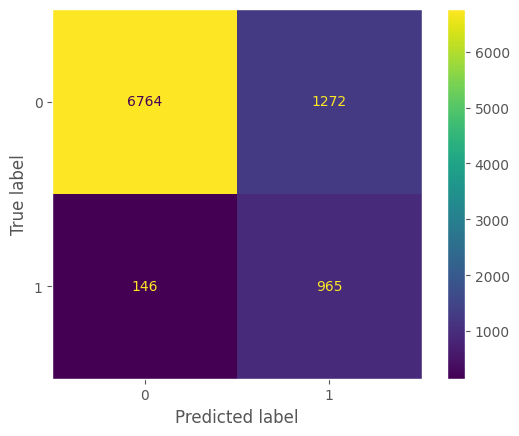

In [22]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,lr_pred,ax=plt.gca())
plt.grid(False)
plt.show()

Accuracy score of logistic regression model

In [23]:
lr_accuracy=np.round(accuracy_score(y_test,lr_pred),3)
print(f"Accuracy Score: {accuracy_score(y_test,lr_pred)*100}%")

Accuracy Score: 84.49764950256915%


In [24]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      8036
           1       0.43      0.87      0.58      1111

    accuracy                           0.84      9147
   macro avg       0.71      0.86      0.74      9147
weighted avg       0.91      0.84      0.87      9147



Create a dataframe containing accuracy, precision, recall, and f1 for logistic regression model

In [25]:
lr_precision=np.round(precision_score(y_test, lr_pred),3)
lr_recall=np.round(recall_score(y_test, lr_pred),3)
lr_f1=np.round(f1_score(y_test, lr_pred),3)

In [26]:
lr_score = {
    'Model': 'Logistic Regression',
    'Accuracy': lr_accuracy,
    'Precision': lr_precision,
    'Recall': lr_recall,
    'f1': lr_f1
}
lr_score = pd.DataFrame(lr_score, index=[''])
lr_score

,Model,Accuracy,Precision,Recall,f1
,Logistic Regression,0.845,0.431,0.869,0.576


Create the final logistic regression model by fitting the entire dataset.

In [27]:
final_lr_model = LogisticRegression(class_weight="balanced",random_state=666,max_iter=5000)
final_lr_model.fit(X,y)

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=666)

Shows the beta coefficient of logistic regression model.

In [28]:
pd.DataFrame(data=[final_lr_model.intercept_[0]] + list(final_lr_model.coef_[0]),
             columns=["Unstandardized Coefficients"],
             index=["Constant"] + list(X.columns)).rename_axis(index="Variable")

,Unstandardized Coefficients
Variable,
Constant,0.013051
duration,0.006268
nr.employed,0.000037
pdays,-0.001925
euribor3m,-0.336722
emp.var.rate,-0.481327
previous,-0.150330
poutcome,0.263262
month,-0.062323


Tuliskan persamaan model regresi logistik, dimana :
$$ \pi(x) = \frac{e^{\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n}}{1 + e^{\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n}} $$

In [29]:
e,x = sp.Symbol("e"),sp.Symbol("(x)")
x_symbols = [sp.Symbol(f"({i})") for i in X.columns]

sums = np.round(final_lr_model.intercept_[0],6)
for i in range(len(X.columns)):
    sums += x_symbols[i] * np.round(final_lr_model.coef_[0][i],6)

sp.Eq(sp.pi*x,e**sums / (1 + e**sums))

Eq(pi*(x), e**(0.006268*(duration) - 0.481327*(emp.var.rate) - 0.336722*(euribor3m) - 0.062323*(month) + 3.7e-5*(nr.employed) - 0.001925*(pdays) + 0.263262*(poutcome) - 0.15033*(previous) + 0.013051)/(e**(0.006268*(duration) - 0.481327*(emp.var.rate) - 0.336722*(euribor3m) - 0.062323*(month) + 3.7e-5*(nr.employed) - 0.001925*(pdays) + 0.263262*(poutcome) - 0.15033*(previous) + 0.013051) + 1))

## **K-Nearest Neighbors**

Find the optimal K value by comparing K values with their error rates

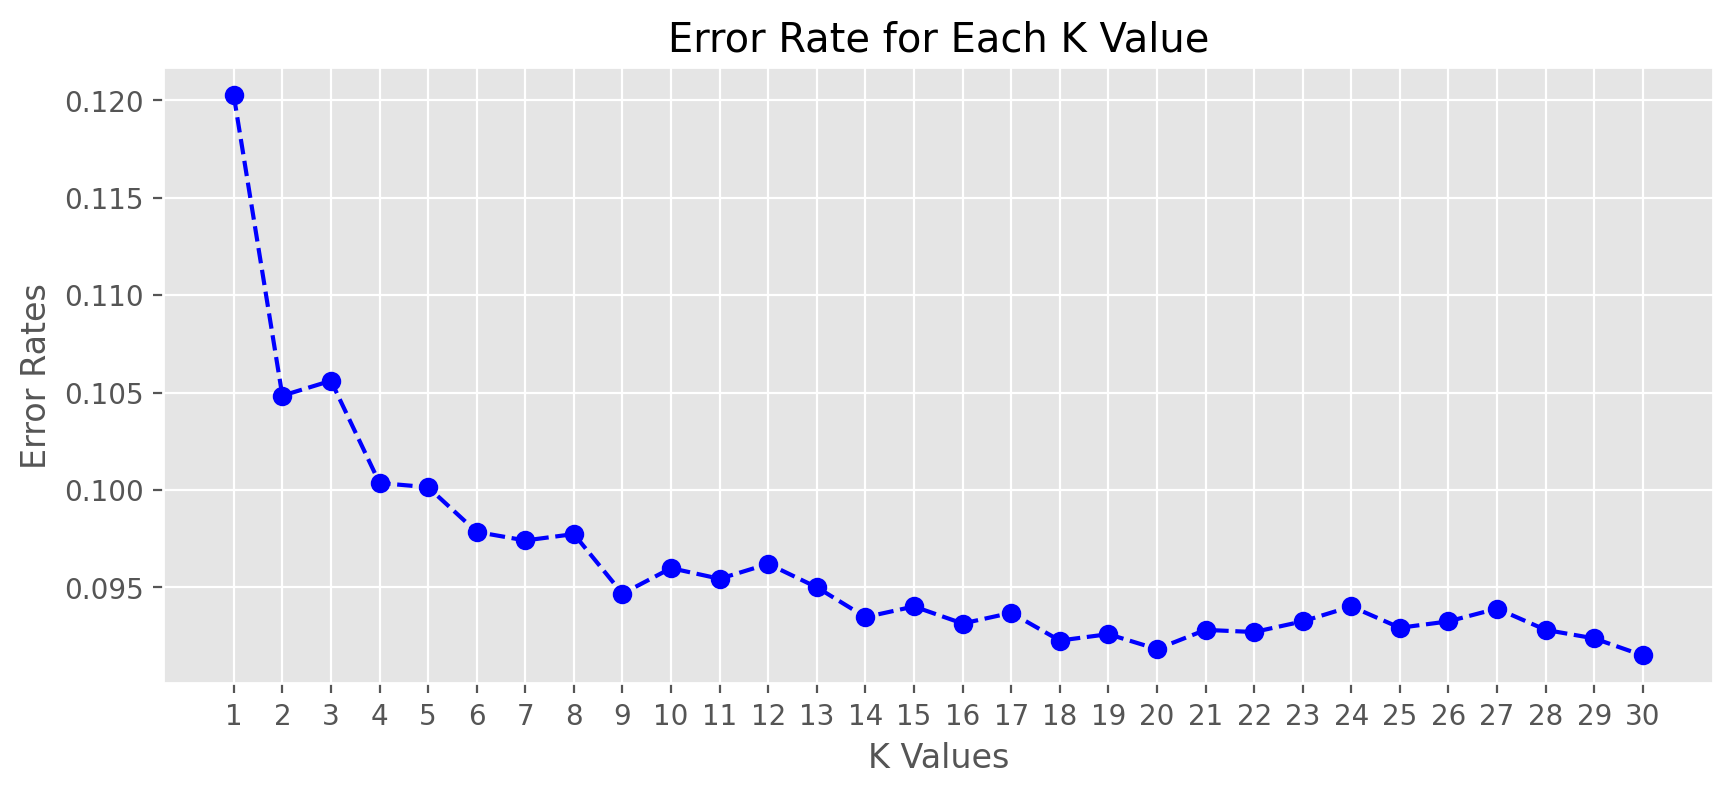

In [30]:
from sklearn.neighbors import KNeighborsClassifier

errors = []
for i in range(1,31):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(scaled_X_train,y_train)
    pred = model.predict(scaled_X_test)
    error = 1 - accuracy_score(y_test,pred)
    errors.append(error)

plt.figure(figsize=(10,4),dpi=200)
plt.plot(range(1,31),errors,color="blue",marker="o",ls="--")
plt.title("Error Rate for Each K Value")
plt.xlabel("K Values")
plt.xticks(range(1,31))
plt.ylabel("Error Rates")
plt.show()

Based on the point above, it can be seen that the optimal K value is 9. Thus, create a KNN model with K = 9

In [31]:
k=9
knn_model = KNeighborsClassifier(n_neighbors=k,weights="distance").fit(scaled_X_train,y_train)
knn_model

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [32]:
knn_predict= knn_model.predict(scaled_X_test)

Prediction result of the K-Nearest Neighbors model

In [33]:
knn_pred = knn_model.predict(scaled_X_test)

Evaluate model KNN

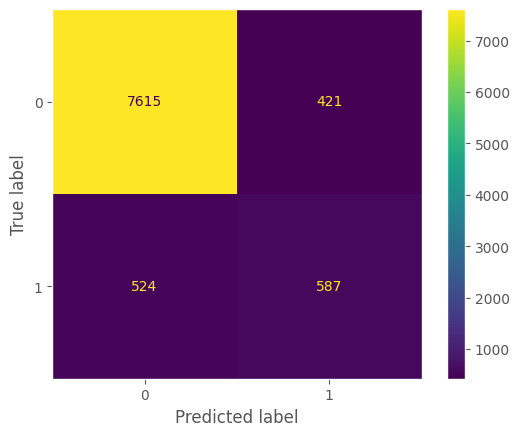

Accuracy Score: 89.7%


In [34]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,knn_pred,ax=plt.gca())
plt.grid(False)
plt.show()

knn_accuracy=np.round(accuracy_score(y_test,knn_pred),3)
print(f"Accuracy Score: {knn_accuracy*100}%")

In [35]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      8036
           1       0.58      0.53      0.55      1111

    accuracy                           0.90      9147
   macro avg       0.76      0.74      0.75      9147
weighted avg       0.89      0.90      0.89      9147



Create a dataframe including accuracy, precision, recall, and f1 for the KNN model.

In [36]:
knn_precision=np.round(precision_score(y_test, knn_pred),3)
knn_recall=np.round(recall_score(y_test, knn_pred),3)
knn_f1=np.round(f1_score(y_test, knn_pred),3)

In [37]:
knn_score = {
    'Model': 'K-Nearest Neighbors',
    'Accuracy': knn_accuracy,
    'Precision': knn_precision,
    'Recall': knn_recall,
    'f1': knn_f1
}
knn_score = pd.DataFrame(knn_score, index=[''])
knn_score

,Model,Accuracy,Precision,Recall,f1
,K-Nearest Neighbors,0.897,0.582,0.528,0.554


Create the final KNN model by fitting the whole dataset

In [38]:
final_knn_model = KNeighborsClassifier(n_neighbors=k,weights="distance")
final_knn_model.fit(X,y)

KNeighborsClassifier(n_neighbors=9, weights='distance')

## **Support Vector Machine**

Create a SVM Model

In [39]:
svm_model = SVC(class_weight="balanced",random_state=888)
svm_model.fit(scaled_X_train,y_train)

SVC(class_weight='balanced', random_state=888)

Predict using SVM Model

In [40]:
svm_pred = svm_model.predict(scaled_X_test)

Evaluate SVM Model

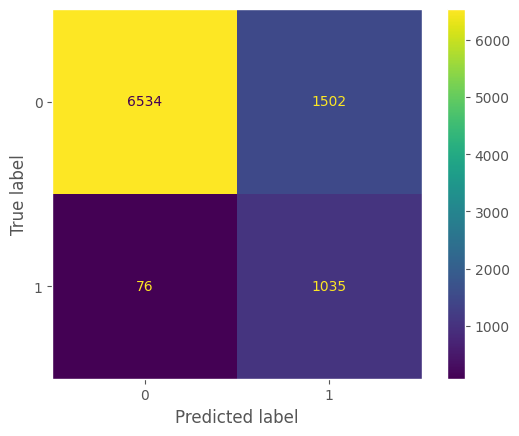

Accuracy Score: 82.69999999999999%


In [41]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,svm_pred,ax=plt.gca())
plt.grid(False)
plt.show()

svm_accuracy=np.round(accuracy_score(y_test,svm_pred),3)
print(f"Accuracy Score: {svm_accuracy*100}%")

Create the final SVM Model by fitting the whole dataset.

In [42]:
final_svm_model = SVC(class_weight="balanced",random_state=888)
final_svm_model.fit(X,y)

SVC(class_weight='balanced', random_state=888)

In [43]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      8036
           1       0.41      0.93      0.57      1111

    accuracy                           0.83      9147
   macro avg       0.70      0.87      0.73      9147
weighted avg       0.92      0.83      0.85      9147



Create a dataframe including accuracy, precision, recall, and f1 for model SVM

In [44]:
svm_precision=np.round(precision_score(y_test, svm_pred),3)
svm_recall=np.round(recall_score(y_test, svm_pred),3)
svm_f1=np.round(f1_score(y_test, svm_pred),3)

In [45]:
svm_score = {
    'Model': 'Support Vector Machine',
    'Accuracy': svm_accuracy,
    'Precision': svm_precision,
    'Recall': svm_recall,
    'f1': svm_f1
}
svm_score = pd.DataFrame(svm_score, index=[''])
svm_score

,Model,Accuracy,Precision,Recall,f1
,Support Vector Machine,0.827,0.408,0.932,0.567


Create the final SVM model by fitting the whole dataset

In [46]:
final_svm_model = SVC(class_weight="balanced",random_state=888)
final_svm_model.fit(X,y)

SVC(class_weight='balanced', random_state=888)

## **Decision Tree**

Create a model decision tree

In [47]:
dt_model = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=666)
dt_model.fit(scaled_X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=666)

Predict using model decision tree

In [48]:
dt_pred = dt_model.predict(scaled_X_test)

Evaluate the model decision tree

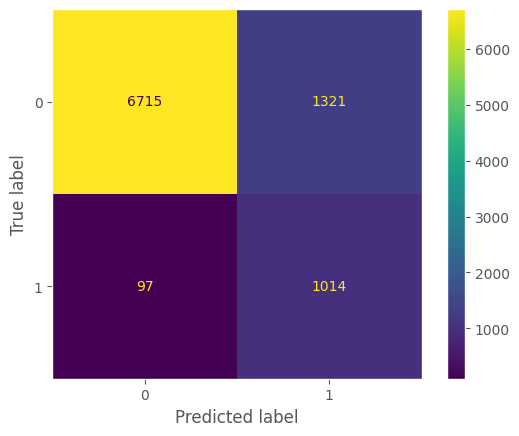

Accuracy Score: 84.5%


In [49]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,dt_pred,ax=plt.gca())
plt.grid(False)
plt.show()

dt_accuracy=np.round(accuracy_score(y_test,dt_pred),3)
print(f"Accuracy Score: {dt_accuracy*100}%")

In [50]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.90      8036
           1       0.43      0.91      0.59      1111

    accuracy                           0.84      9147
   macro avg       0.71      0.87      0.75      9147
weighted avg       0.92      0.84      0.87      9147



Make a dataframe that includes Accuracy, precision, recall, and f1 for decision tree model.

In [51]:
dt_precision=np.round(precision_score(y_test, dt_pred),3)
dt_recall=np.round(recall_score(y_test, dt_pred),3)
dt_f1=np.round(f1_score(y_test, dt_pred),3)

In [52]:
dt_score = {
    'Model': 'Decision Tree',
    'Accuracy': dt_accuracy,
    'Precision': dt_precision,
    'Recall': dt_recall,
    'f1': dt_f1
}
dt_score = pd.DataFrame(dt_score, index=[''])
dt_score

,Model,Accuracy,Precision,Recall,f1
,Decision Tree,0.845,0.434,0.913,0.589


Show the features importance according to decision tree model

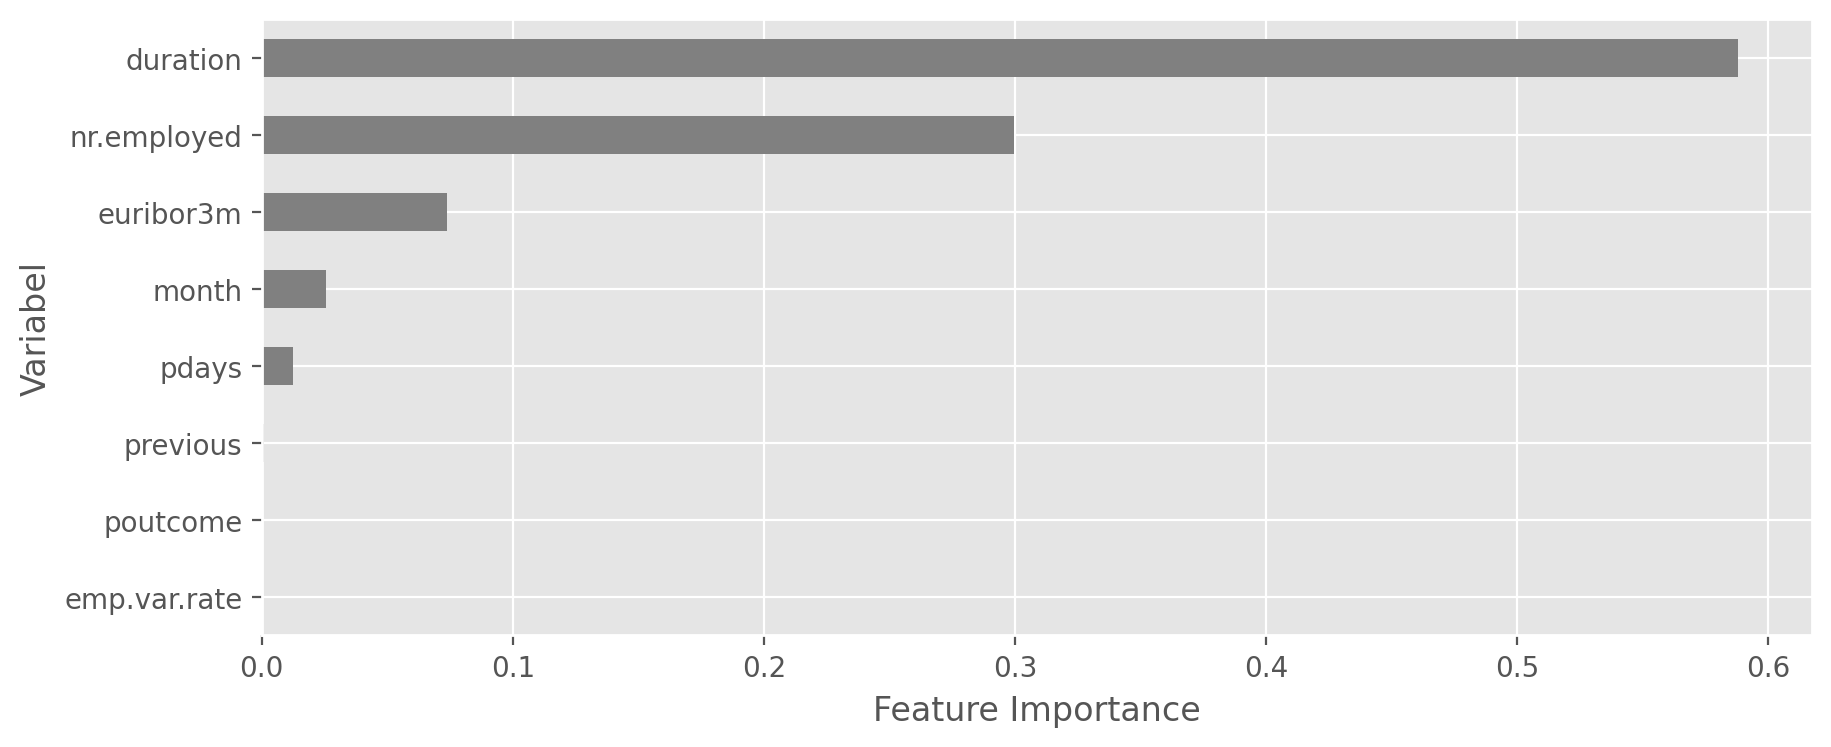

In [53]:
plt.figure(dpi=200)
pd.DataFrame(data=dt_model.feature_importances_,index=X.columns,columns=["Feature Importance"]
            ).sort_values("Feature Importance",ascending=True).plot(figsize=(10,4),
                                                                     kind="barh",
                                                                     legend=None,
                                                                     color="grey",
                                                                     ax=plt.gca())
plt.xlabel("Feature Importance")
plt.ylabel("Variabel")
plt.show()

Create the final decision tree model by fitting the whole of dataset.

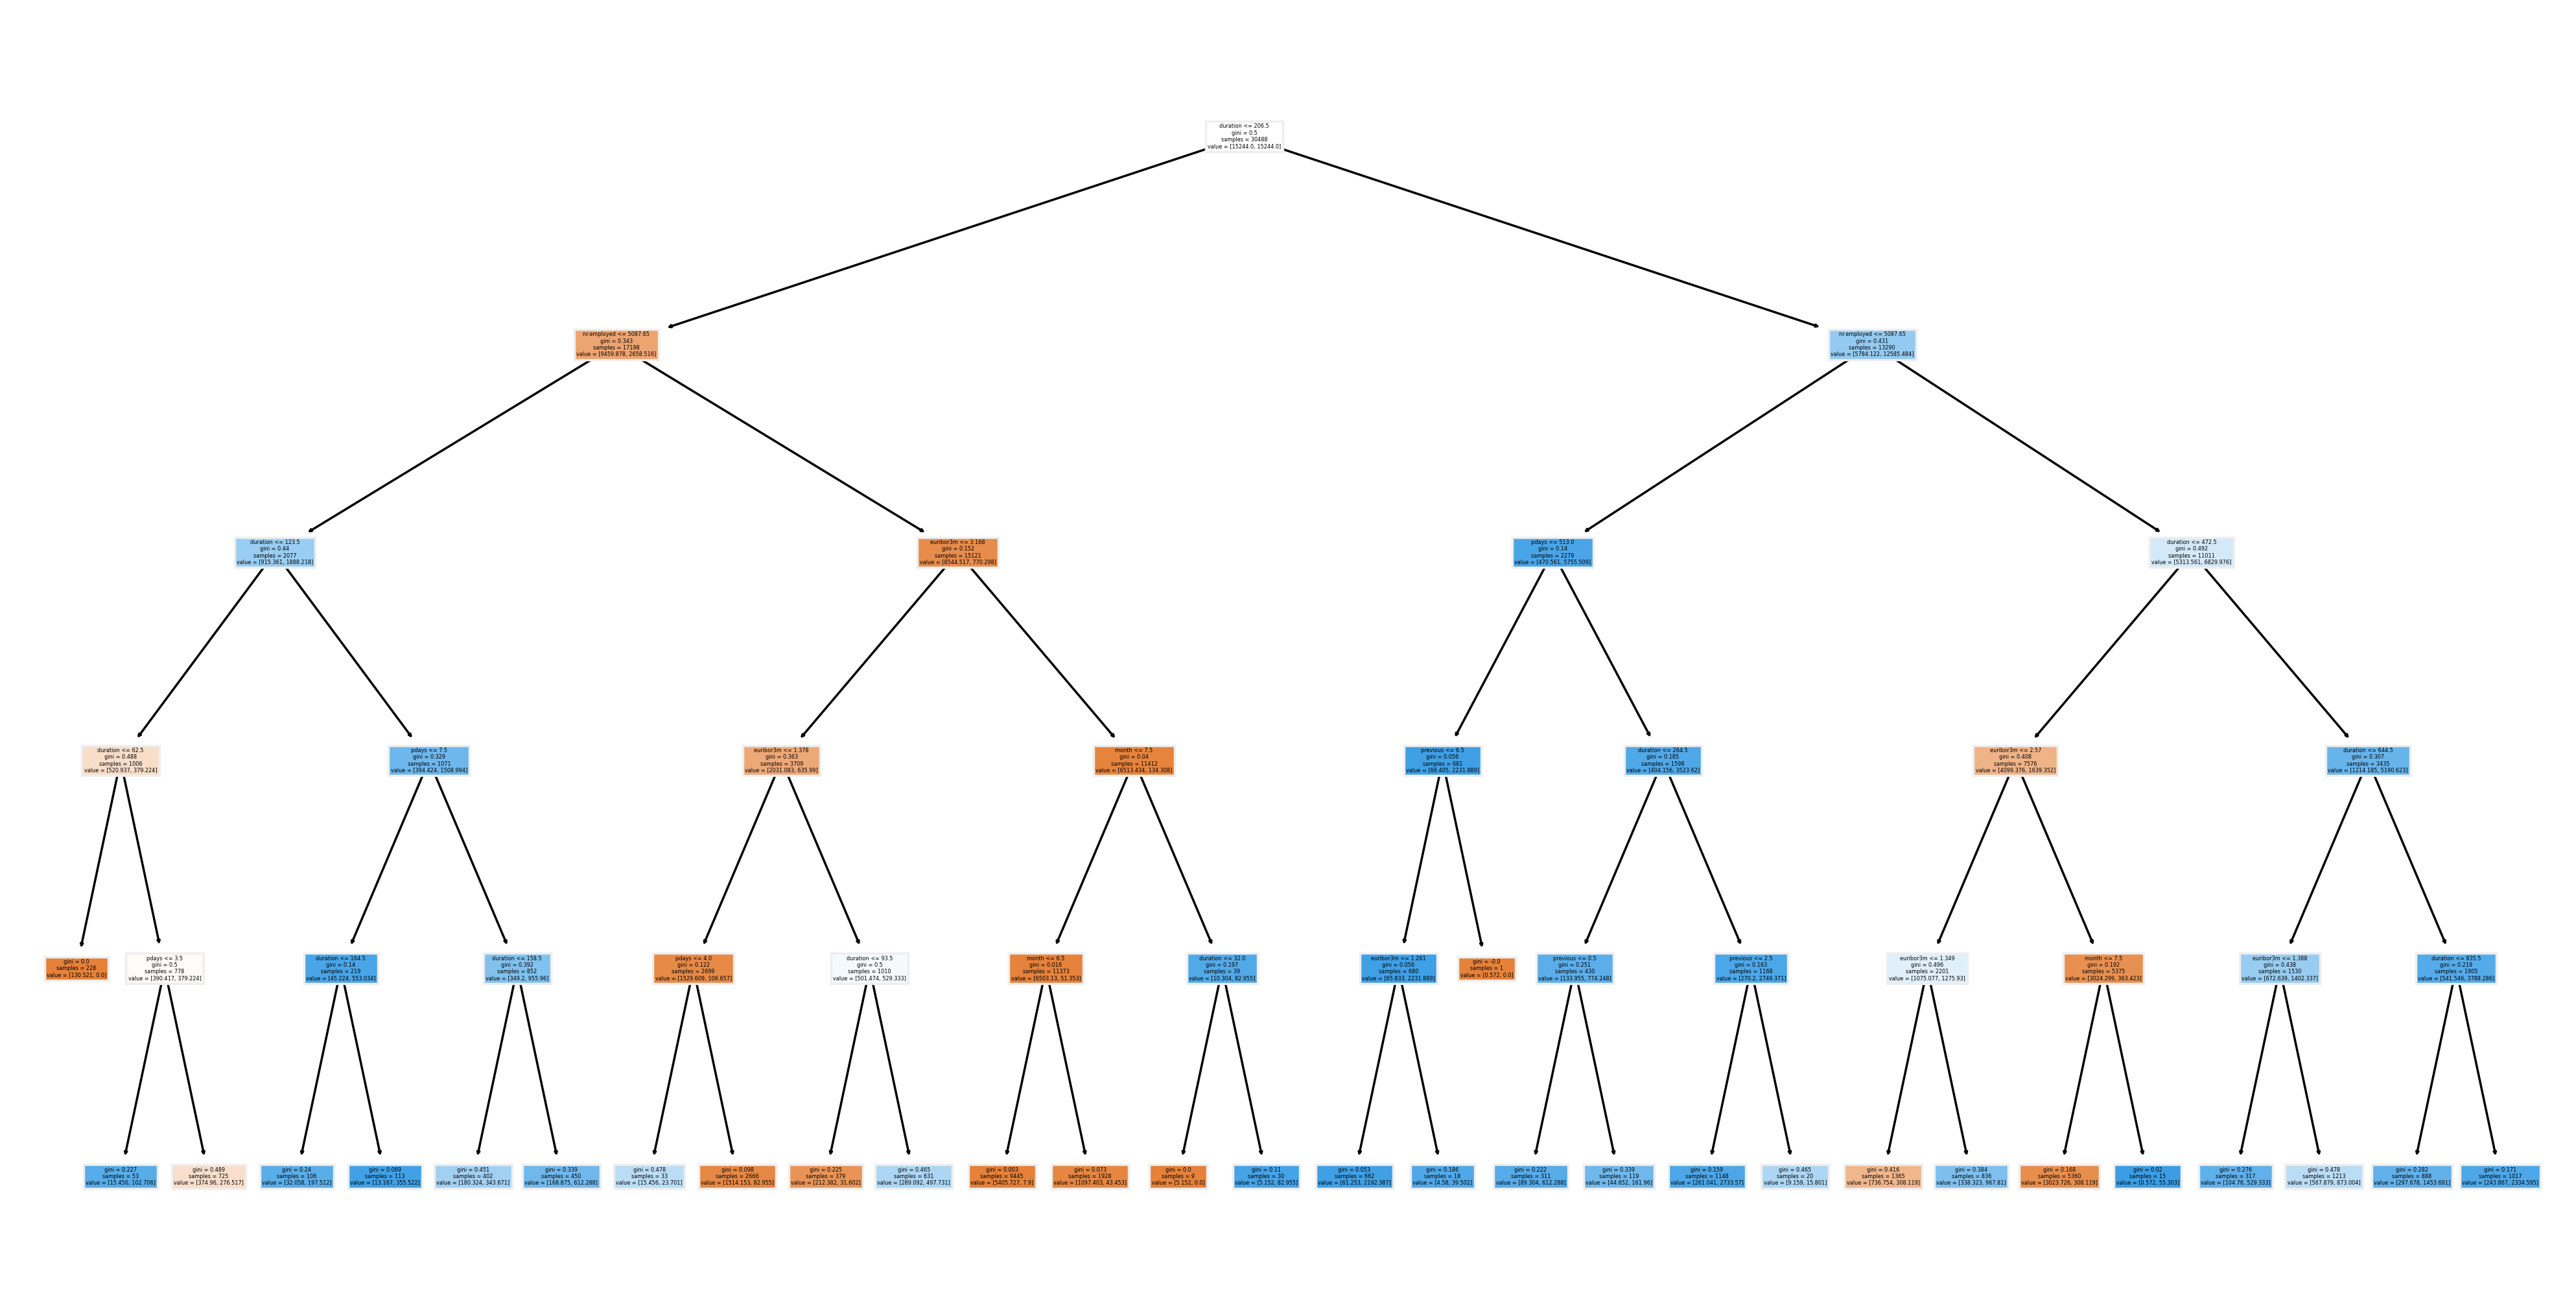

In [54]:
final_dt_model = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=888)
final_dt_model.fit(X,y)

plt.figure(figsize=(10,5),dpi=500)
plot_tree(final_dt_model,filled=True,feature_names=X.columns)
plt.show()

## **Random Forest**

Find the optimal number of trees by comparing numbers of trees with their error rates.

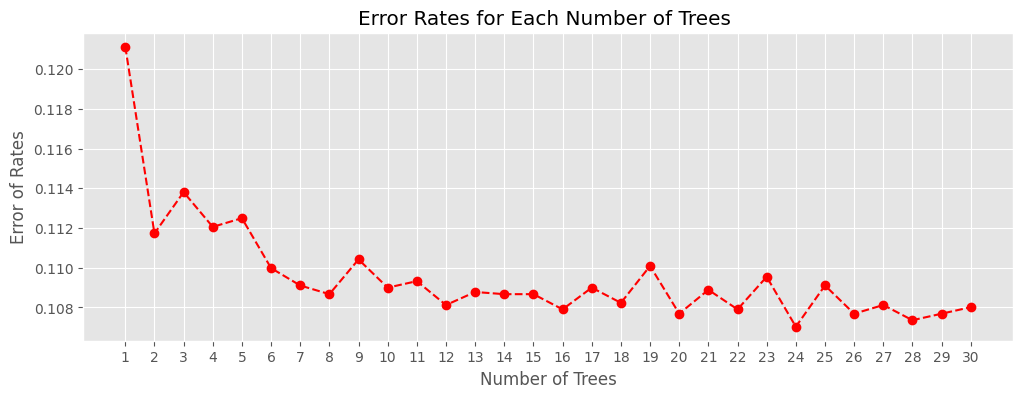

In [57]:
errors = []
for i in range(1,31):
    model = RandomForestClassifier(n_estimators=i,class_weight="balanced",random_state=666)
    model.fit(scaled_X_train,y_train)
    pred = model.predict(scaled_X_test)
    error = 1 - accuracy_score(y_test,pred)
    errors.append(error)

plt.figure(figsize=(12,4))
plt.plot(range(1,31),errors,color="red",marker="o",ls="--")
plt.title("Error Rates for Each Number of Trees ")
plt.xlabel("Number of Trees")
plt.xticks(range(1,31))
plt.ylabel("Error of Rates")
plt.show()

Based on the plot above, it can be seen that the optimal number of trees is 8. Therefore, create a random forest model with the number of trees = 8.

In [58]:
n = 8
rf_model = RandomForestClassifier(n_estimators=n,class_weight="balanced",random_state=666)
rf_model.fit(scaled_X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=8,
                       random_state=666)

Predict using Random Forest Model

In [59]:
rf_pred = rf_model.predict(scaled_X_test)

Evaluate the model of random forest

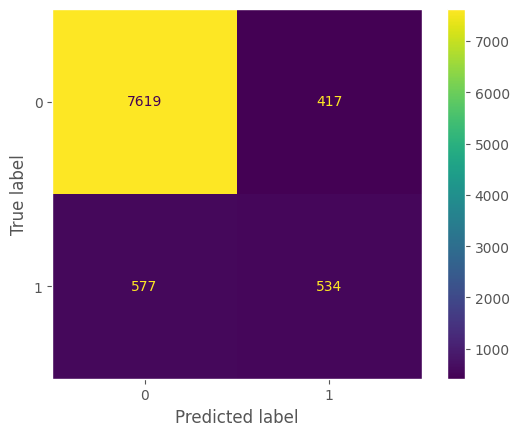

Accuracy Score: 89.1%


In [60]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,rf_pred,ax=plt.gca())
plt.grid(False)
plt.show()

rf_accuracy=np.round(accuracy_score(y_test,rf_pred),3)
print(f"Accuracy Score: {rf_accuracy*100}%")

In [61]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      8036
           1       0.56      0.48      0.52      1111

    accuracy                           0.89      9147
   macro avg       0.75      0.71      0.73      9147
weighted avg       0.88      0.89      0.89      9147



Create a dataframe that includes accuracy, precision. and f1 for the random forest model.

In [62]:
rf_precision=np.round(precision_score(y_test, rf_pred),3)
rf_recall=np.round(recall_score(y_test, rf_pred),3)
rf_f1=np.round(f1_score(y_test, rf_pred),3)

In [63]:
rf_score = {
    'Model': 'Random Forest',
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'f1': rf_f1
}
rf_score = pd.DataFrame(rf_score, index=[''])
rf_score

,Model,Accuracy,Precision,Recall,f1
,Random Forest,0.891,0.562,0.481,0.518


Show each feature importance based on random forest model.

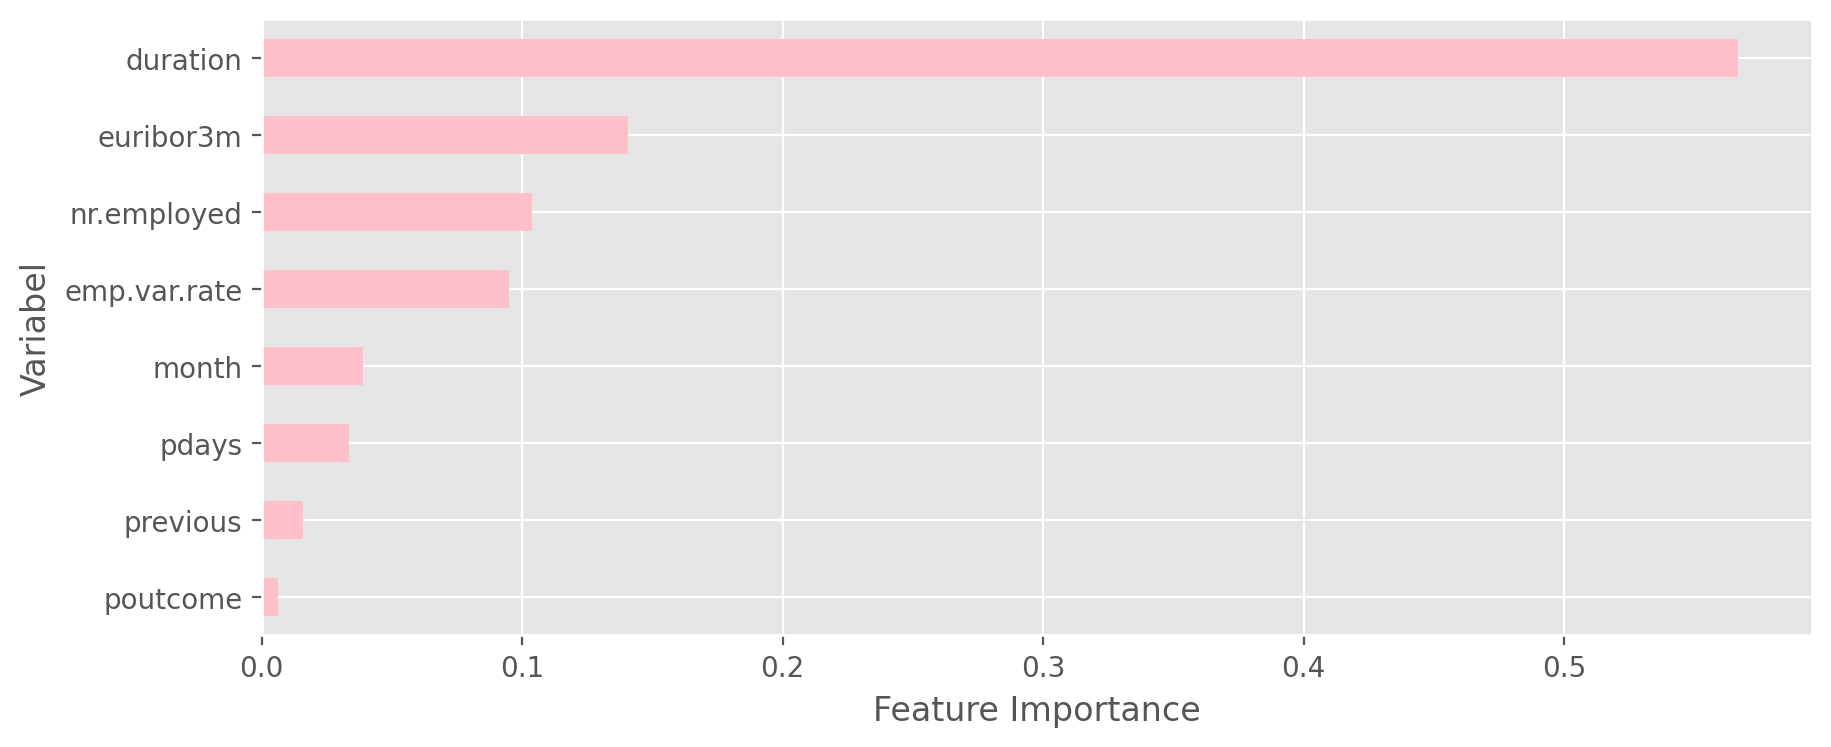

In [64]:
plt.figure(dpi=200)
pd.DataFrame(data=rf_model.feature_importances_,index=X.columns,columns=["Feature Importance"]
            ).sort_values("Feature Importance",ascending=True).plot(figsize=(10,4),
                                                                    kind="barh",
                                                                    legend=None,
                                                                    color="pink",
                                                                    ax=plt.gca())
plt.xlabel("Feature Importance")
plt.ylabel("Variabel")
plt.show()

Create the final random forest model by fitting the whole of dataset.

In [65]:
final_rf_model = RandomForestClassifier(n_estimators=n,class_weight="balanced",random_state=666)
final_rf_model.fit(X,y)

RandomForestClassifier(class_weight='balanced', n_estimators=8,
                       random_state=666)

## **Naive Bayes**

Create Naive Bayes model

In [66]:
nb_model = GaussianNB()
nb_model.fit(scaled_X_train,y_train)

GaussianNB()

Predict using Naive Bayes model

In [67]:
nb_pred = nb_model.predict(scaled_X_test)

Evaluate Naive Bayes Model

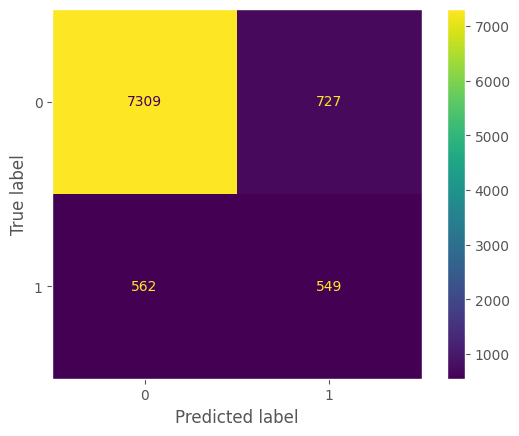

Accuracy Score: 85.9%


In [68]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,nb_pred,ax=plt.gca())
plt.grid(False)
plt.show()

nb_accuracy=np.round(accuracy_score(y_test,nb_pred),3)
print(f"Accuracy Score: {nb_accuracy*100}%")

In [69]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      8036
           1       0.43      0.49      0.46      1111

    accuracy                           0.86      9147
   macro avg       0.68      0.70      0.69      9147
weighted avg       0.87      0.86      0.86      9147



Create a dataframe that includes accuracy, precision, and f1 for Naive Bayes model

In [70]:
nb_precision=np.round(precision_score(y_test, nb_pred),3)
nb_recall=np.round(recall_score(y_test, nb_pred),3)
nb_f1=np.round(f1_score(y_test, nb_pred),3)

In [71]:
nb_score = {
    'Model': 'Naive Bayes',
    'Accuracy': nb_accuracy,
    'Precision': nb_precision,
    'Recall': nb_recall,
    'f1': nb_f1
}
nb_score = pd.DataFrame(nb_score, index=[''])
nb_score

,Model,Accuracy,Precision,Recall,f1
,Naive Bayes,0.859,0.43,0.494,0.46


Create the final of Naive Bayes model by fitting the whole of dataset

In [72]:
final_nb_model = GaussianNB()
final_nb_model.fit(X,y)

GaussianNB()

## **The Best Algorithm Model**

Merged all of dataframe that include accuracy, precision, and f1 for all models.

In [73]:
all_model_scores=pd.concat([lr_score,knn_score,svm_score,dt_score,rf_score,nb_score])
all_model_scores

,Model,Accuracy,Precision,Recall,f1
,Logistic Regression,0.845,0.431,0.869,0.576
,K-Nearest Neighbors,0.897,0.582,0.528,0.554
,Support Vector Machine,0.827,0.408,0.932,0.567
,Decision Tree,0.845,0.434,0.913,0.589
,Random Forest,0.891,0.562,0.481,0.518
,Naive Bayes,0.859,0.430,0.494,0.460


**Conclusion** : Although the KNN, random forest, and naive bayes models have higher *accuracy* values than the other models, it can be seen in the confusion matrix that the three models only predict a small percentage of *yes or 1* labels correctly. In other words, the three models are not accurate so they cannot be used.

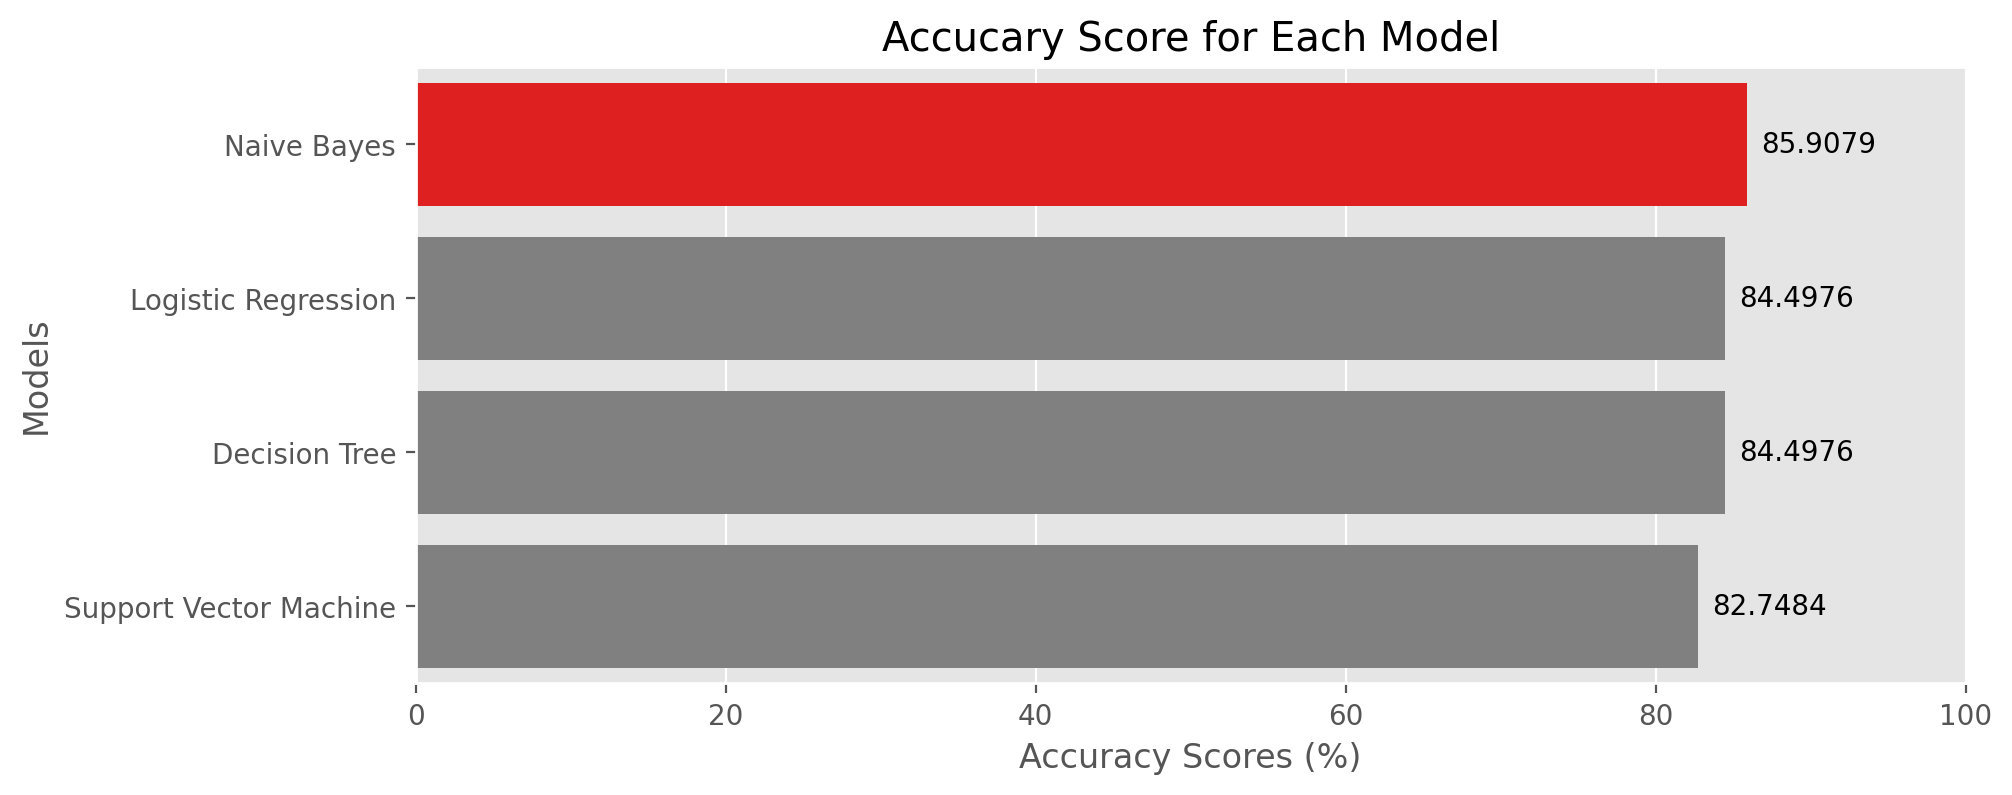

In [77]:
preds = [lr_pred,svm_pred,dt_pred,nb_pred]
models = ["Logistic Regression","Support Vector Machine","Decision Tree","Naive Bayes"]
accuracy_scores = [accuracy_score(y_test,i)*100 for i in preds]

comparison = pd.DataFrame(
    data=accuracy_scores,columns=["Accuracy Scores"],index=models
).sort_values("Accuracy Scores",ascending=False)

plt.figure(figsize=(10,4),dpi=200)
barplot = sns.barplot(
    data=comparison,
    x="Accuracy Scores",
    y=comparison.index,
    orient="h",
    palette=["red" if i == comparison.head(1).iloc[0,0] else "grey" for i in comparison["Accuracy Scores"]]
)
for bars in barplot.containers:
    barplot.bar_label(bars,padding=5)
plt.title("Accucary Score for Each Model")
plt.xlabel("Accuracy Scores (%)")
plt.ylabel("Models")
plt.xlim(xmax=100)
plt.show()

In [79]:
top3_model_scores = all_model_scores[all_model_scores['Accuracy']<0.850]
top3_model_scores

,Model,Accuracy,Precision,Recall,f1
,Logistic Regression,0.845,0.431,0.869,0.576
,Support Vector Machine,0.827,0.408,0.932,0.567
,Decision Tree,0.845,0.434,0.913,0.589


For the remaining three models, the **decision tree** model has the highest *precision* and *f1* values with the same highest *accuracy* value as the logistic regression model and the second highest *recall*. So, it can be concluded that the **decision tree** model is the best model for this case. For more clarity, please see the following plot.

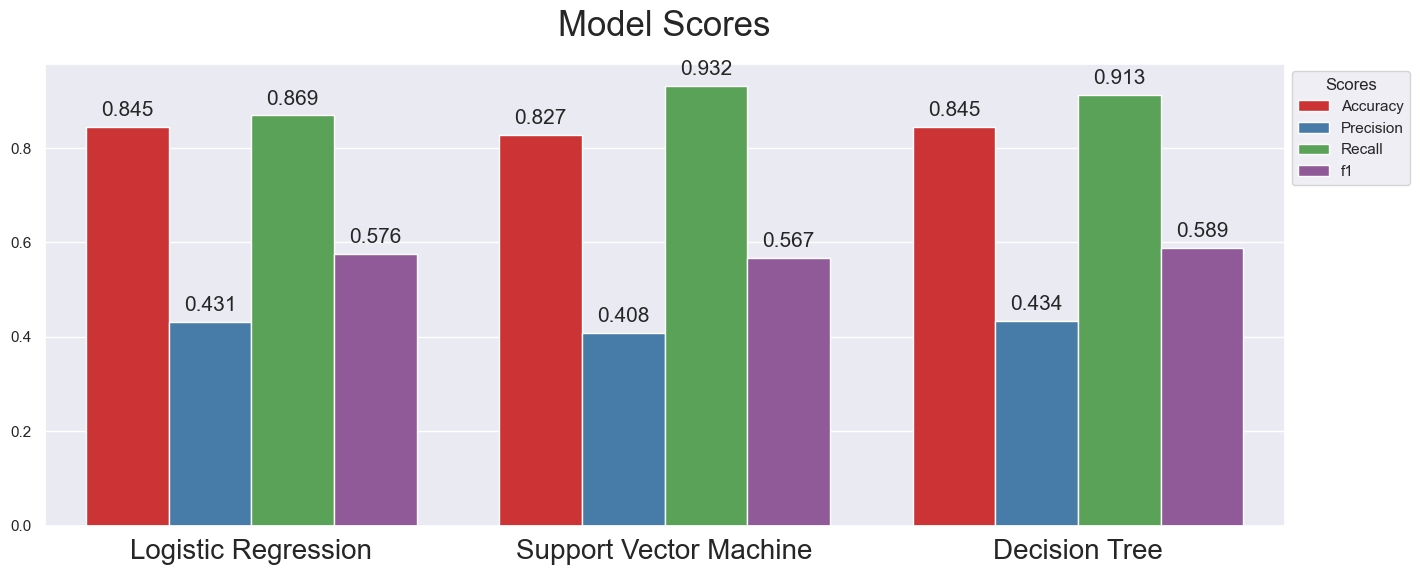

In [80]:
top3_model_melted = pd.melt(top3_model_scores, id_vars='Model', var_name='Scores', value_name='Values')

sns.set(style="darkgrid")
sns.set_palette("Set1")
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Model", y="Values", hue="Scores", data=top3_model_melted)
for i in ax.containers:
    ax.bar_label(i,padding=5,size=15)

ax.legend(title="Scores", loc="upper left", bbox_to_anchor=(1, 1))
plt.title("Model Scores",size=25,pad=20)
plt.xticks(size=20)
plt.xlabel("")
plt.ylabel("")
plt.show()

Compare the actual value to each prediction's model

In [81]:
pd.DataFrame(data=np.stack([lr_pred,svm_pred,dt_pred],axis=1),
             columns=top3_model_scores['Model'],
             index=y_test.values).rename_axis(index="Actual Values")

Model,Logistic Regression,Support Vector Machine,Decision Tree
Actual Values,,,
0,0,0,0
0,1,1,1
0,0,0,0
0,0,0,0
0,0,0,0
...,...,...,...
0,0,0,0
0,0,0,0
1,1,1,1


Save all final models for future use such as to make predictions on data that has never been seen before.

In [82]:
models = [final_lr_model,final_knn_model,final_svm_model,
          final_dt_model,final_rf_model,final_nb_model]
file_names = ["logistic_regression","k-nearest_neighbors","support_vector_machine",
              "decision_tree","random_forest","naive_bayes"]

for i,j in zip(models,file_names):
    dump(i,j + ".joblib")
    print(f"{j}.joblib has been saved successfully!")

logistic_regression.joblib has been saved successfully!
k-nearest_neighbors.joblib has been saved successfully!
support_vector_machine.joblib has been saved successfully!
decision_tree.joblib has been saved successfully!
random_forest.joblib has been saved successfully!
naive_bayes.joblib has been saved successfully!
